
# LIBRERIAS
Preparar subir y manipular datos
- NumPy
- Pandas

Rapidez en computacion matematica
- TensorFlow
- Aesara based on Theano

Graficar
-Matplotlib

Resolver ecuaciones matematicas y algoritmos
- SciPy

Versiones eficazes de algoritmos comunes de ML
- SCikit-learn

Facilitar la implementacion de redes neuronales
- Keras

DL y acelera el path de prototipar el desarrollo
- Pytorch


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

- `MinMaxScaler` → **escala** los valores a un** rango fijo** `(0–1)`.

- `StandardScaler` → **centra los valores en 0** y los mide en **desviaciones estánda**r.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


- `make_classification` → Crea **datos sintéticos para clasificación**.  
  - Genera `X` (características) y `y` (etiquetas).

- `train_test_split` → Divide los datos en **entrenamiento y prueba**.  
  - Permite evaluar si el modelo **generaliza**.

- `accuracy_score` → Mide la **exactitud del modelo**.  
  - Proporción de predicciones correctas sobre el total.

- `DecisionTreeClassifier` → Modelo de **árbol de decisión para clasificación**.  
  - Aprende reglas tipo “si…, entonces…” para predecir la clase.


# PREPARAR LOS DATOS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('titanic.csv',sep='\t')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [ ]:
df['Travellingalone'] = np.where(df['SibSp'] + df['Parch']> 0 , 0 ,1 ).astype('uint8')

In [ ]:
df1 = df.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch'],axis=1)

In [ ]:
df1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,30
Fare,0
Embarked,1
Travellingalone,0


In [ ]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travellingalone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


**pd.get_dummies** en pandas sirve para convertir variables categóricas (texto o categorías) en variables numéricas mediante el método one-hot encoding.

In [ ]:
df_titanic =  pd.get_dummies(df1, columns= ['Pclass','Sex','Embarked'], drop_first=True, dtype= 'int')

In [ ]:
df_titanic.head()

,Survived,Age,Fare,Travellingalone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,0,1
3,1,35.0,53.1000,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,1,1,0,1


In [ ]:
x = df_titanic.drop(['Survived'],axis=1)
y = df_titanic['Survived']

In [ ]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [ ]:
df_MM = trans_MM.fit_transform(x)
pd.DataFrame(df_MM)

,0,1,2,3,4,5,6,7
0,0.301696,0.001951,0.0,0.0,1.0,1.0,0.0,1.0
1,0.529714,0.251837,0.0,0.0,0.0,0.0,0.0,0.0
2,0.358700,0.004585,1.0,0.0,1.0,0.0,0.0,1.0
3,0.486960,0.180878,0.0,0.0,0.0,0.0,0.0,1.0
4,0.486960,0.005073,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
151,0.301696,0.233561,0.0,0.0,0.0,0.0,0.0,1.0
152,0.779108,0.005073,1.0,0.0,1.0,1.0,0.0,1.0
153,0.565341,0.030244,0.0,0.0,1.0,1.0,0.0,1.0
154,0.389219,0.002195,1.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
df_SS = trans_SS.fit_transform(x)
pd.DataFrame(df_SS)

,0,1,2,3,4,5,6,7
0,-0.469480,-0.531122,-1.094159,-0.48795,0.790569,0.748331,-0.301511,0.646670
1,0.753620,1.099279,-1.094159,-0.48795,-1.264911,-1.336306,-0.301511,-1.546384
2,-0.163705,-0.513935,0.913944,-0.48795,0.790569,-1.336306,-0.301511,0.646670
3,0.524289,0.636300,-1.094159,-0.48795,-1.264911,-1.336306,-0.301511,0.646670
4,0.524289,-0.510753,0.913944,-0.48795,0.790569,0.748331,-0.301511,0.646670
...,...,...,...,...,...,...,...,...
151,-0.469480,0.980034,-1.094159,-0.48795,-1.264911,-1.336306,-0.301511,0.646670
152,2.091385,-0.510753,0.913944,-0.48795,0.790569,0.748331,-0.301511,0.646670
153,0.944729,-0.346524,-1.094159,-0.48795,0.790569,0.748331,-0.301511,0.646670
154,0.000000,-0.529531,0.913944,-0.48795,0.790569,0.748331,-0.301511,0.646670


# APRENDIZAJE SUPERVISADO

## OVERFITTING / UNDERFITTING

###  Bias (Sesgo)
- Mide **qué tan lejos están las predicciones de la realidad**, en promedio.
- Aparece cuando el modelo es **demasiado simple**.
- **Alto bias → Underfitting**.

---

### Variance (Varianza)
- Mide **qué tanto cambian las predicciones si los datos cambian**.
- Aparece cuando el modelo es **demasiado complejo**, aprende ruido.
- **Alta variance → Overfitting**.

---

| Caso            | Bias  | Variance | Ejemplo                                    |
|-----------------|-------|----------|--------------------------------------------|
| Underfitting    | Alto  | Bajo     | Modelo muy simple (no aprende patrones)   |
| Overfitting     | Bajo  | Alto     | Modelo muy complejo (memoriza los datos)  |
| Ideal           | Bajo  | Bajo     | Modelo equilibrado que generaliza bien    |




### Detección en la classificación en **DECISION TREES**

In [ ]:
X, y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=4)

Parámetros clave de `make_classification`

- `n_samples` → Número total de filas (ejemplos) en el dataset.  
- `n_features` → Número total de columnas (características) en el dataset.  
- `n_informative` → Número de características **relevantes** para predecir la clase.  
- `n_redundant` → Número de características **dependientes de las informativas** (combinaciones lineales).  
- `random_state` → Semilla para que la generación de datos sea **reproducible**.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [ ]:
train_score , test_score = list() , list()

In [ ]:
values = [i for i in range(1,21)]

In [ ]:
for i in values:
  model = DecisionTreeClassifier(max_depth=i, random_state=4)
  model.fit(X_train, y_train) # Entrena el árbol con los datos de entrenamiento
  train_yhat = model.predict(X_train) # Hace predicciones sobre los datos de entrenamiento.
  train_acc = accuracy_score(y_train, train_yhat) # Calcula la exactitud (accuracy) del modelo en los datos de entrenamiento.
  test_yhat = model.predict(X_test) # Hace predicciones sobre los datos de prueba.
  test_acc = accuracy_score(y_test, test_yhat) # Calcula la exactitud (accuracy) en los datos de prueba.
  train_score.append(train_acc)
  test_score.append(test_acc) # Guarda las exactitudes en listas para poder graficar o analizar después.
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.838, test: 0.832
>2, train: 0.852, test: 0.851
>3, train: 0.872, test: 0.868
>4, train: 0.902, test: 0.889
>5, train: 0.915, test: 0.904
>6, train: 0.933, test: 0.910
>7, train: 0.955, test: 0.933
>8, train: 0.970, test: 0.943
>9, train: 0.980, test: 0.942
>10, train: 0.983, test: 0.946
>11, train: 0.987, test: 0.946
>12, train: 0.991, test: 0.945
>13, train: 0.994, test: 0.943
>14, train: 0.996, test: 0.943
>15, train: 0.997, test: 0.943
>16, train: 0.998, test: 0.941
>17, train: 0.998, test: 0.942
>18, train: 0.999, test: 0.947
>19, train: 0.999, test: 0.944
>20, train: 0.999, test: 0.947


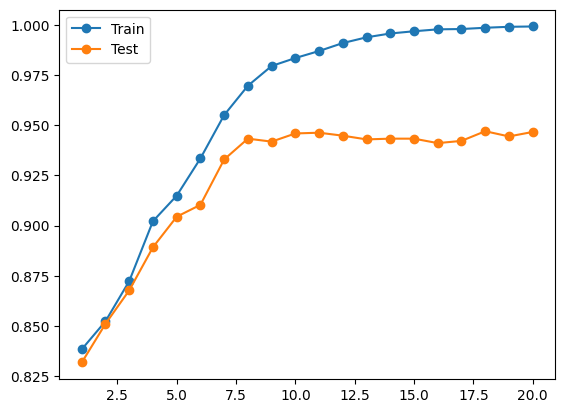

In [ ]:
plt.plot(values, train_score, 'o-', label='Train')
plt.plot(values, test_score, 'o-', label='Test')
plt.legend()
plt.show()

#### Análisis de Overfitting según max_depth

- **Profundidades 1–4:**  
  - Train accuracy y Test accuracy bajas.  
  - Modelo demasiado simple → **underfitting leve**.

- **Profundidades 5–10:**  
  - Train y Test accuracy altas y cercanas.  
  - Buen equilibrio → **modelo generaliza bien**.

- **Profundidades >15:**  
  - Train accuracy muy alta (0.999), Test accuracy se estanca (0.943–0.947).  
  - Modelo memoriza los datos de entrenamiento → **inicio de overfitting leve**.


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[2,4,6,10,20], 'min_samples_split':[5,10,20,50,100]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid,n_jobs=-1, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

#### Hiperparámetros de DecisionTreeClassifier usados en GridSearchCV


| Hiperparámetro       | Valores a probar          | Descripción                                                                 |
|----------------------|--------------------------|-----------------------------------------------------------------------------|
| `criterion`          | 'gini', 'entropy'        | Métrica para medir la “pureza” de un nodo.                                  |
| `max_depth`          | 2, 4, 6, 10, 20          | Profundidad máxima del árbol.                                               |
| `min_samples_split`  | 5, 10, 20, 50, 100       | Número mínimo de muestras requeridas para dividir un nodo.                  |

**Nota:** GridSearchCV probará **todas las combinaciones posibles** de estos hiperparámetros y seleccionará la que produzca la **mejor exactitud (accuracy)** mediante validación cruzada.

---

- **Gini (Índice de Gini):** mide la impureza de un nodo.  
  - Fórmula: `Gini = 1 - sum(p_i^2)`  
  - `p_i` → proporción de la clase i en el nodo.  
  - Menor Gini → nodo más puro → mejor división.  
  - Ventaja: rápido de calcular.  

- **Entropy (Entropía o Ganancia de Información):** mide la impureza basada en teoría de la información.  
  - Fórmula: `Entropy = - sum(p_i * log2(p_i))`  
  - Menor entropía → nodo más puro → mejor división.  
  - Ventaja: sensible a distribuciones de clases desbalanceadas.  

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

In [ ]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.9723809523809523
0.9418518518518518


#### Comparación de Accuracy en Max Depth = 10

| Configuración                        | Train Accuracy | Test Accuracy | Notas sobre min_samples_split |
|-------------------------------------|----------------|---------------|-------------------------------|
| Antes: max_depth=10, min_samples_split=2 | 0.983          | 0.946         | Valor por defecto, árbol más profundo, riesgo de overfitting |
| Ahora: max_depth=10, min_samples_split=10 | 0.972          | 0.942         | Se aumentó min_samples_split, árbol más simple, overfitting mitigado |

---
- Al aumentar `min_samples_split` de 2 → 10, el **train accuracy baja ligeramente**, indicando que el árbol **ya no memoriza tanto** los datos de entrenamiento.  
- El **test accuracy se mantiene estable**, por lo que el modelo **generaliza casi igual de bien**.  
- Diferencia train-test más pequeña → **overfitting reducido**.  
- Conclusión: ajustar `min_samples_split` es una forma efectiva de controlar la complejidad del árbol sin tocar demasiado `max_depth`.


### DATA FILTERING

El objetivo es **reducir la cantidad de variables (features) que usa un modelo**, quedándose solo con las **más importantes**.  
Beneficios:
- Mejor interpretabilidad del modelo.
- Reducir overfitting.
- Acelerar el entrenamiento.

#### **EMBEDDED TECHINQUES**
Estas técnicas seleccionan variables **durante el entrenamiento del modelo** usando regularización o coeficientes.




##### L1 Regularization
- Aplica L1 regularization que fuerza algunos coeficientes a ser **exactamente cero**.
- `SelectFromModel` permite quedarse solo con las features importantes.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectFromModel

# Datos sintéticos
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Lasso para selección
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Seleccionar variables importantes
selector = SelectFromModel(lasso, prefit=True)
X_selected = selector.transform(X)

print("Features seleccionadas (Lasso):", selector.get_support())


Features seleccionadas (Lasso): [ True  True  True  True  True  True  True  True  True  True]


##### L2 Regularization

- L2 reduce los **coeficientes grandes** pero no los hace cero.
- Controla overfitting cuando hay muchas variables correlacionadas.

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Mostrar coeficientes
print("Coeficientes Ridge:", np.round(ridge.coef_, 3))



Coeficientes Ridge: [16.765 53.656  5.026 63.053 92.449 70.303 86.179  9.817  3.314 69.932]


##### Elastic Net

- Combina L1 y L2 (mezcla de Lasso y Ridge).
- Elimina features irrelevantes y regulariza coeficientes.

In [ ]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.1, l1_ratio=0.5)  # mezcla de Lasso (L1) y Ridge (L2)
enet.fit(X, y)

selector = SelectFromModel(enet, prefit=True)
X_selected_enet = selector.transform(X)

print("Features seleccionadas (Elastic Net):", selector.get_support())


Features seleccionadas (Elastic Net): [False  True False  True  True  True  True False False  True]


#### **WRAPPER TECHNIQUES**
Estas técnicas seleccionan variables **probando combinaciones y evaluando el desempeño del modelo**. Son más costosas computacionalmente pero muy efectivas.

##### a) Forward Selection
- Comienza con **ninguna feature** y agrega una por una la que más mejora el rendimiento del modelo.
- Ventaja: evalúa el impacto incremental de cada feature.

---

##### b) Backward Elimination
- Comienza con **todas las features** y elimina una por una la menos relevante.
- Ventaja: evalúa el impacto quitando features, útil para descartar variables redundantes.

---

##### c) Recursive Feature Elimination (RFE)
- Iterativamente entrena el modelo y elimina las features **menos importantes** según los coeficientes.
- Ventaja: preciso para seleccionar las features más relevantes según el modelo.

---

##### d) Sequential Floating Selection (SFS)
- Variante flexible de forward/backward, que permite **agregar o quitar features dinámicamente** para optimizar la métrica.
- Ventaja: combina lo mejor de forward y backward, optimizando la selección de manera más completa.




In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el dataset
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

# 1️⃣ Forward Selection
forward = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
forward.fit(X_train, y_train)
forward_features = [feature_names[i] for i, x in enumerate(forward.get_support()) if x]

# 2️⃣ Backward Elimination
backward = SequentialFeatureSelector(model, n_features_to_select=5, direction='backward')
backward.fit(X_train, y_train)
backward_features = [feature_names[i] for i, x in enumerate(backward.get_support()) if x]

# 3️⃣ Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)
rfe_features = [feature_names[i] for i, x in enumerate(rfe.support_) if x]

# 4️⃣ Sequential Floating Selection (SFS con mlxtend)
sfs = SFS(estimator=model, k_features=5, forward=True, floating=True, scoring='r2', cv=5)
sfs.fit(X_train, y_train)
sfs_features = list(sfs.k_feature_names_)

# Mostrar resultados
print("🔹 Forward Selection:", forward_features)
print("🔹 Backward Elimination:", backward_features)
print("🔹 Recursive Feature Elimination:", rfe_features)
print("🔹 Sequential Floating Selection:", sfs_features)


🔹 Forward Selection: ['sex', 'bmi', 'bp', 's3', 's5']
🔹 Backward Elimination: ['sex', 'bmi', 'bp', 's1', 's5']
🔹 Recursive Feature Elimination: ['bmi', 'bp', 's1', 's2', 's5']
🔹 Sequential Floating Selection: ['1', '2', '3', '6', '8']


## REGRESION

Establece relacion entre la variable dependiente y la indepuente, predice continuos o reales valores

### 📈 Regresión Lineal

La **regresión lineal** es un modelo estadístico que busca predecir una **variable dependiente continua** (Y) a partir de una o más **variables independientes** (X), que pueden ser **continuas o discretas**.

---
- Se utiliza cuando la **relación entre las variables es lineal**.  
- Estima los parámetros del modelo utilizando el **criterio de mínimos cuadrados (Least Squares)**, que minimiza la suma de los errores al cuadrado.  
- El modelo ajusta una recta (o hiperplano en múltiples variables) que mejor se adapta a los datos.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import datasets

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)  # X → variables independientes (features)
housing_df['HousePrice'] = housing.target   # Y → variable objetivo (precio de la casa)

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
housing_df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
HousePrice,0


`pairplot` → Es una función de Seaborn que crea una matriz de gráficos de dispersión. Muestra **cómo se relacionan todas las variables entre sí** en el DataFrame.

En la **diagonal**, dibuja **histogramas de cada variable**

Text(0.5, 0.98, 'Pair Plot of features againt HousePrice')

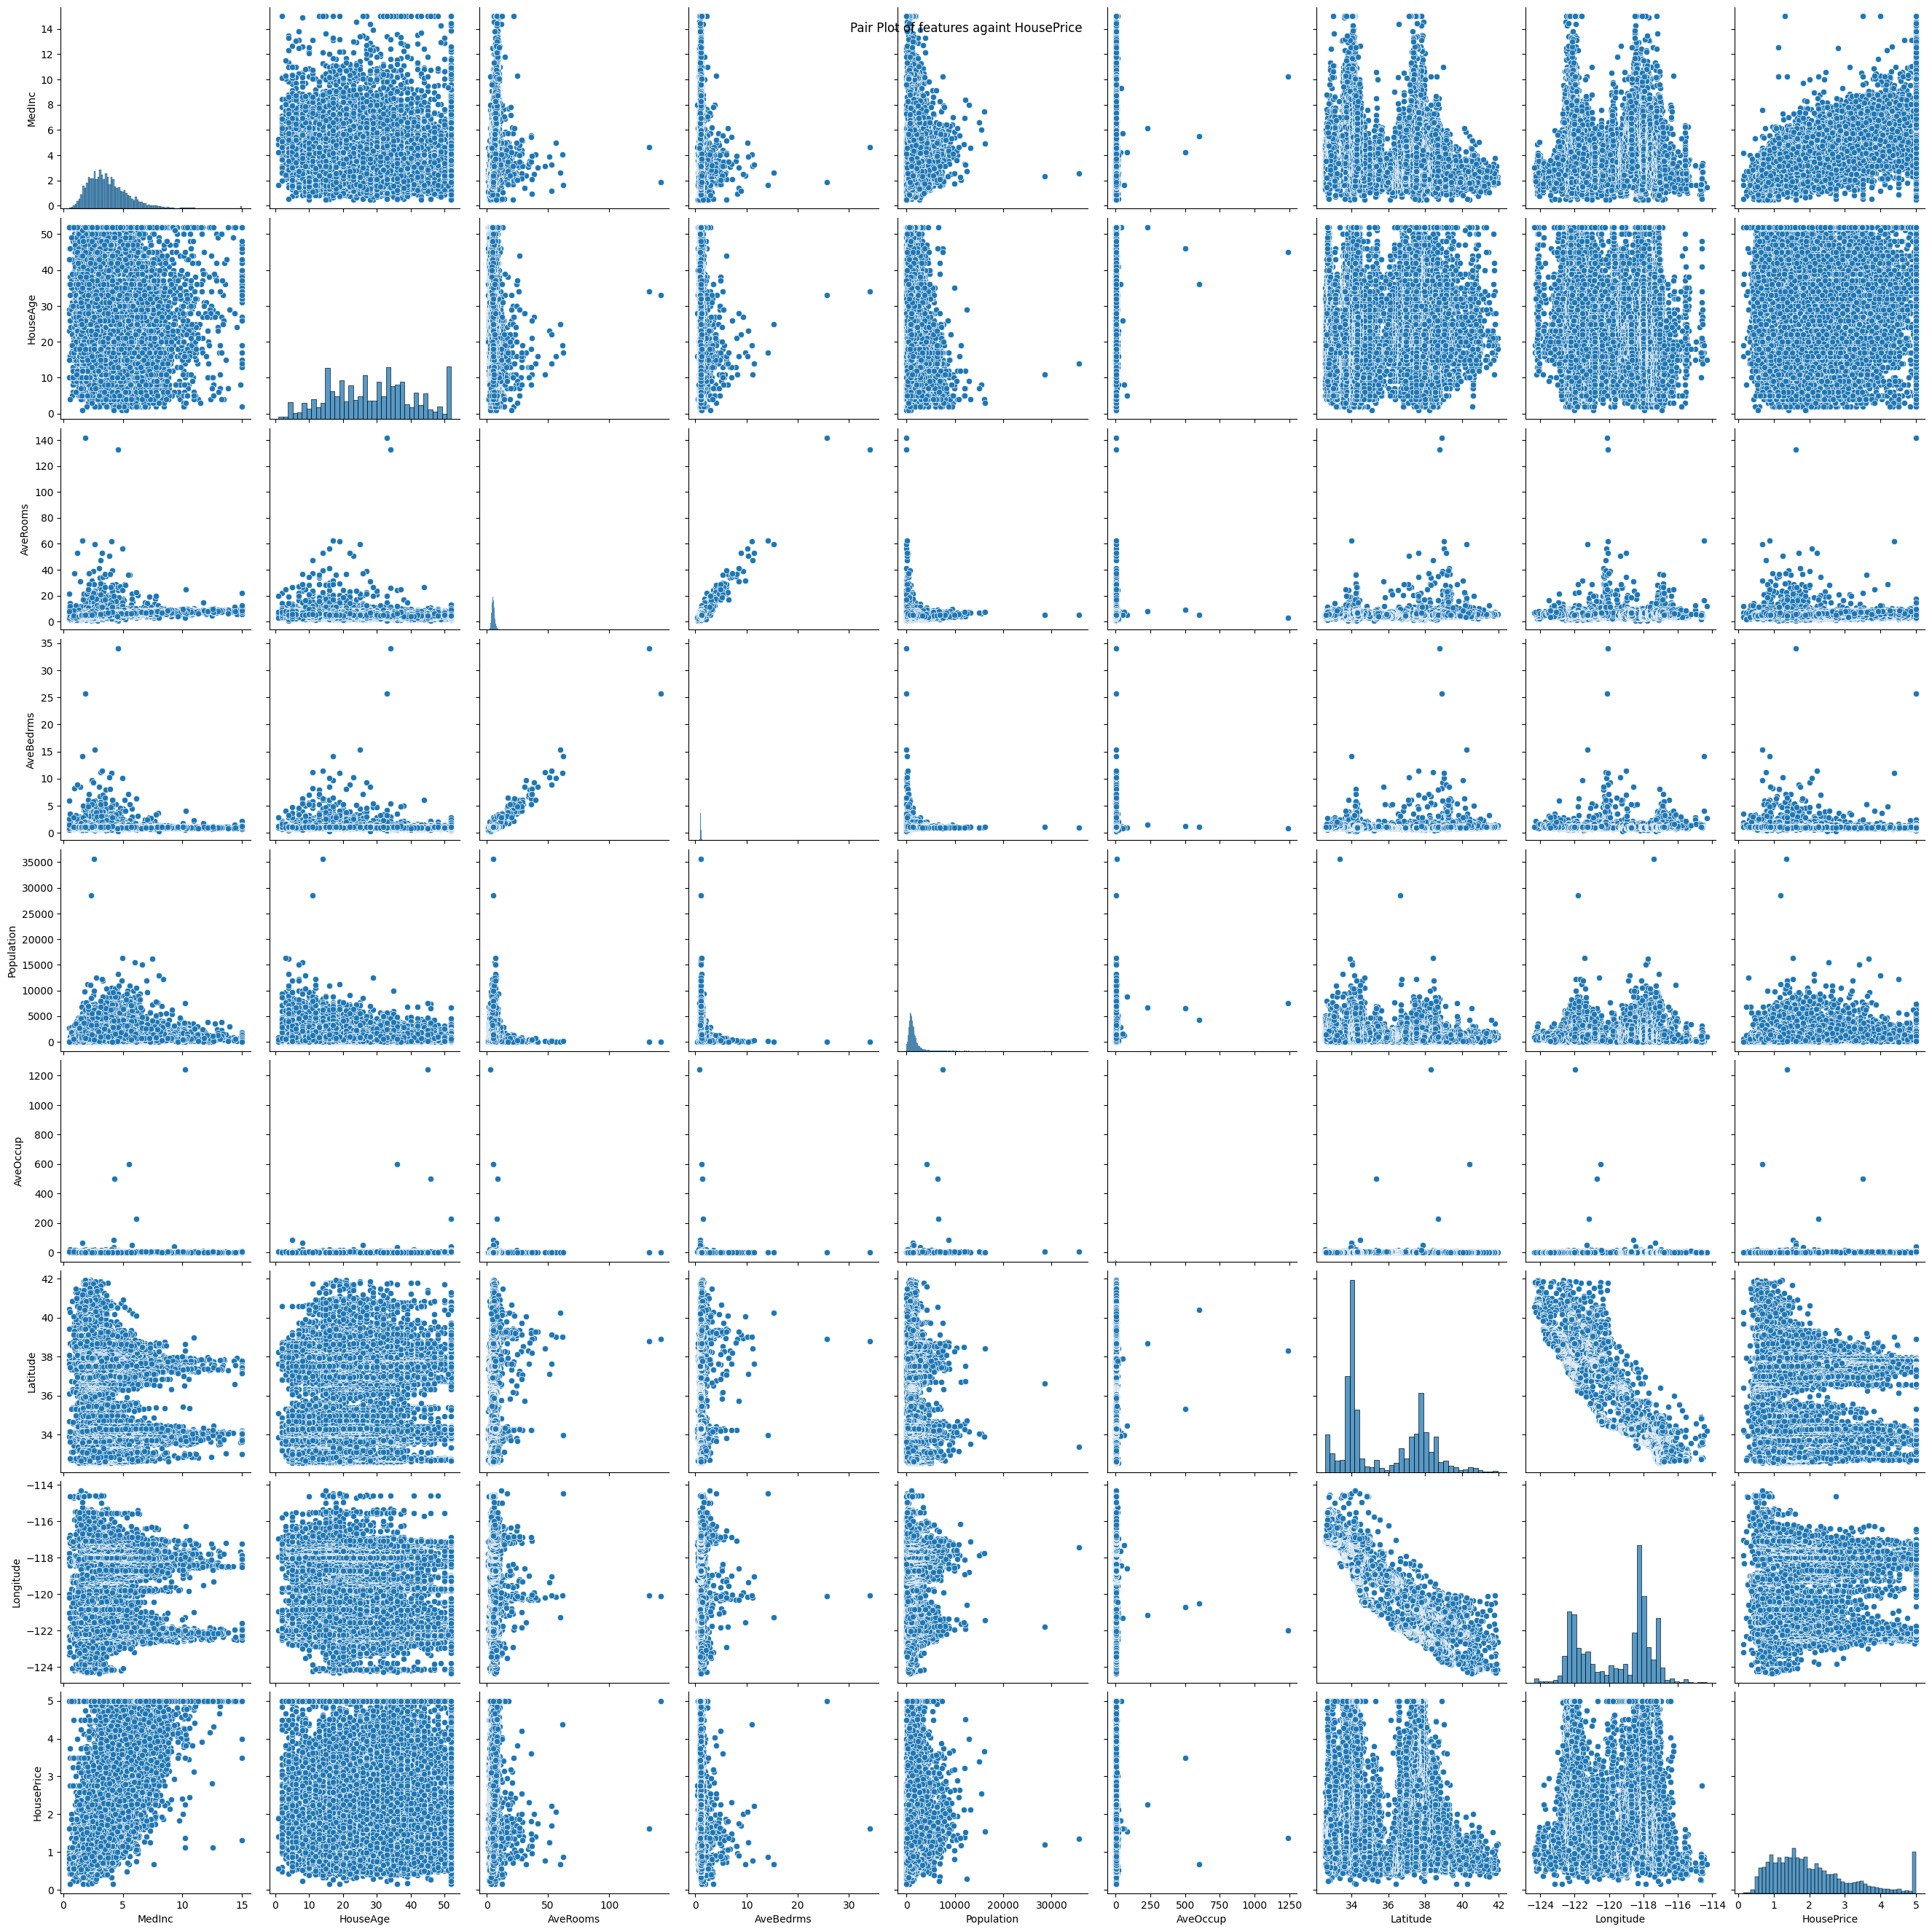

In [ ]:
sns.pairplot(housing_df, height= 3)
plt.suptitle('Pair Plot of features againt HousePrice')

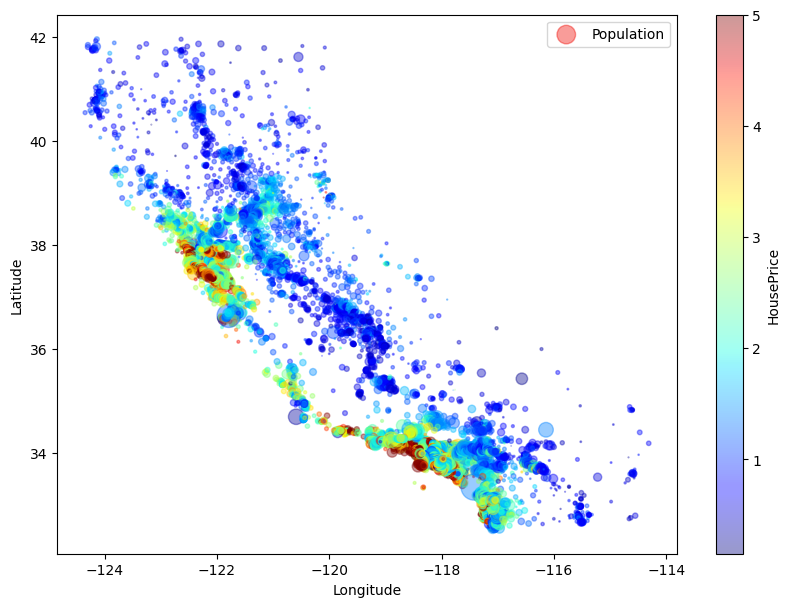

In [ ]:
housing_df.plot(
    kind='scatter',          # Tipo de gráfico: dispersión
    x='Longitude',           # Eje X → coordenada de longitud
    y='Latitude',            # Eje Y → coordenada de latitud
    alpha=0.4,               # Transparencia de los puntos (0 = transparente, 1 = opaco)
    s=housing_df['Population']/100,  # Tamaño de cada punto según la población
    label='Population',      # Etiqueta de la leyenda
    c='HousePrice',               # Color de cada punto depende del precio de la vivienda
    figsize=(10,7),          # Tamaño del gráfico
    colorbar=True ,           # Muestra la barra de colores para interpretar precios
    cmap='jet'
)
plt.show()


 **Conclusión del gráfico:**
- La **ubicación geográfica** es un factor clave en el precio de las viviendas.  
- Las **zonas costeras** (San Francisco, Los Ángeles) muestran precios más altos.  
- Las **áreas más pobladas** (puntos grandes) tienden a coincidir con precios elevados.  
- El **interior de California** presenta precios más bajos y menor densidad de población.  


##### CORRELACIÓN

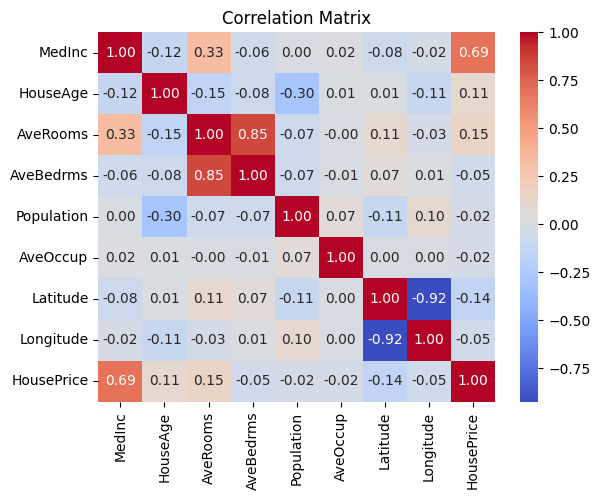

In [ ]:
corr = housing_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr['HousePrice'].abs().sort_values(ascending=False)

,HousePrice
HousePrice,1.000000
MedInc,0.688075
AveRooms,0.151948
Latitude,0.144160
HouseAge,0.105623
AveBedrms,0.046701
Longitude,0.045967
Population,0.024650
AveOccup,0.023737


Podemos observar que hay una fuerte correlación entre HousePrice y MedInc

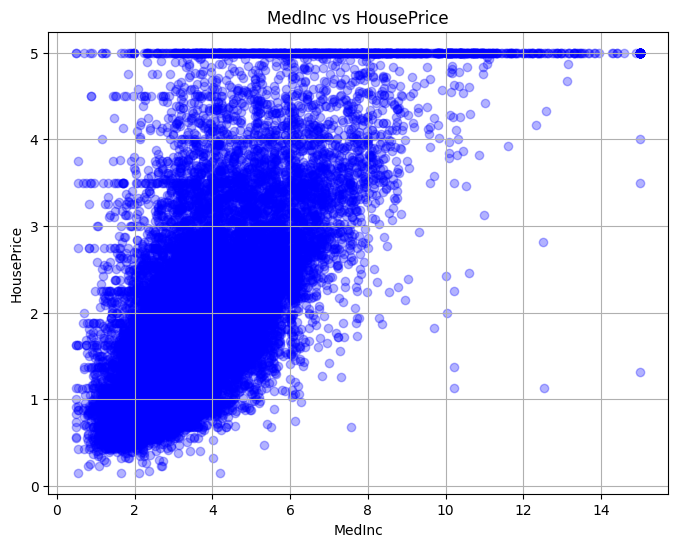

In [ ]:
medinc = housing_df['MedInc']
houseprice = housing_df['HousePrice']

plt.figure(figsize=(8,6))
plt.scatter(medinc, houseprice, alpha = 0.3, color = 'blue')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.title('MedInc vs HousePrice')
plt.grid(True)
plt.show()

#### **Lidiar con la multicolinealidad**

Ocurre cuando dos o más variables independientes (features) están altamente correlacionadas.
- Problema: distorsiona los coeficientes de la regresión y hace que sea difícil interpretar el modelo.

---

#### `Variance Inflation Factor (VIF)`

El **VIF** es una medida que nos ayuda a detectar **multicolinealidad** en regresión lineal.

- \(VIF = 1\): No hay correlación con otras variables.
- \(1 < VIF < 5\): Correlación moderada, aceptable.
- \(VIF > 5\) o \(VIF > 10\): Alta correlación → multicolinealidad significativa → considerar eliminar o combinar variables.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
housing_df_vif = housing_df.drop('HousePrice', axis=1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors='coerce')   # Convertimos los datos a numericos y si no pone un Nan

vif_data = pd.DataFrame()
vif_data["feature"] = housing_df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(housing_df_vif.values, i) for i in range(len(housing_df_vif.columns))]
vif_data

,feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


**Acción sobre Latitude y Longitude**

Ambas variables presentan multicolinealidad extremadamente alta (VIF > 500).  

Para simplificar el modelo y evitar inestabilidad en los coeficientes, **eliminaremos tanto Latitude como Longitude**, siguiendo la metodología del curso.


In [ ]:
housing_df = housing_df.drop(['Latitude', 'Longitude'], axis=1)

#### **MODELO APLICADO**

##### **Ecuación del modelo**

HousePrice = b_0 + b_1 · MedInc + b_2 · HouseAge + b_3 · AveRooms + ...


- **b0 (intercepto)**: calculado automáticamente por el modelo. Representa el valor de `HousePrice` cuando todas las variables independientes son 0.  
- **b1, b2, … (coeficientes)**: indican cuánto cambia `HousePrice` al aumentar 1 unidad de cada variable independiente, manteniendo las demás constantes.

##### **Matrices del modelo**

- **X (matriz de variables independientes)**: contiene todas las features y una columna extra de 1's (`const`) para el intercepto.
- **y (vector objetivo)**: contiene los valores reales de `HousePrice`.



In [ ]:
cols_to_convert =['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df['HousePrice'] = pd.to_numeric(housing_df['HousePrice'], errors='coerce')

X = sm.add_constant(housing_df.drop('HousePrice', axis=1))
y = housing_df['HousePrice']

model = sm.OLS(y, X).fit()

#### **Residuales (Residuos) en Regresión Lineal**

Un residuo es la **diferencia entre el valor real y el valor predicho** por nuestro modelo.  
En otras palabras, nos dice **cuánto se ha equivocado el modelo** para cada observación.

- Si el residuo es 0 → el modelo predijo perfectamente.  
- Si el residuo es positivo → el modelo predijo menos de lo que realmente era.  
- Si el residuo es negativo → el modelo predijo más de lo que realmente era.


Model Coefficients: 
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


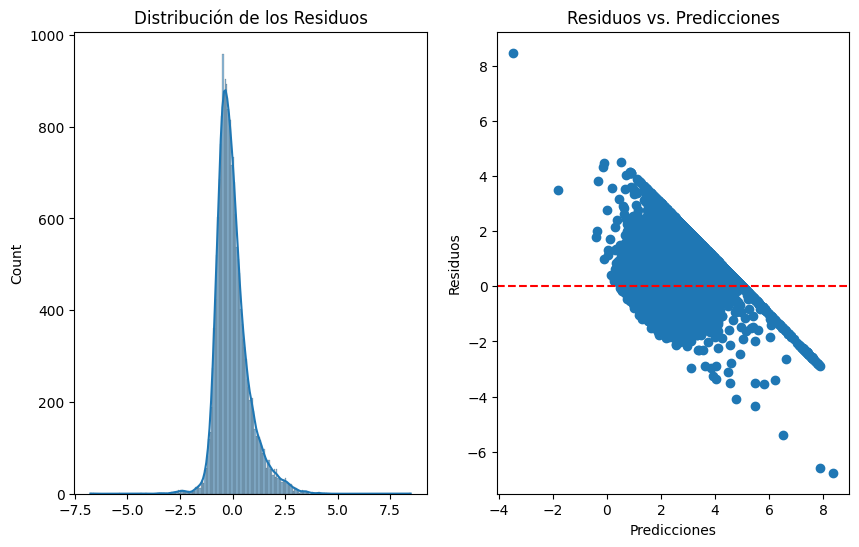

In [ ]:
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title('Distribución de los Residuos')

plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Predicciones')

print('Model Coefficients: \n', model.params)

#### EVALUAR MODELO

Para evaluar nuestro modelo de regresión lineal usamos dos métricas principales:

- **MSE (Mean Squared Error)**: mide el error promedio al cuadrado de las predicciones.  
  - Valores pequeños indican que el modelo predice cerca de los valores reales.  

- **R² (Coeficiente de Determinación)**: indica qué proporción de la variabilidad de la variable objetivo explica el modelo.  
  - Va de 0 a 1; valores más cercanos a 1 significan mejor ajuste.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X)

print('MSE:', mean_squared_error(y, predictions))
print('R2:', r2_score(y, predictions))

MSE: 0.6129156196698703
R2: 0.5396977345638283


#### GESTIONAR OUTLIERS

Podemos atribuir estos resultados a que hay outliers asi que creamos una funcion para observarlos

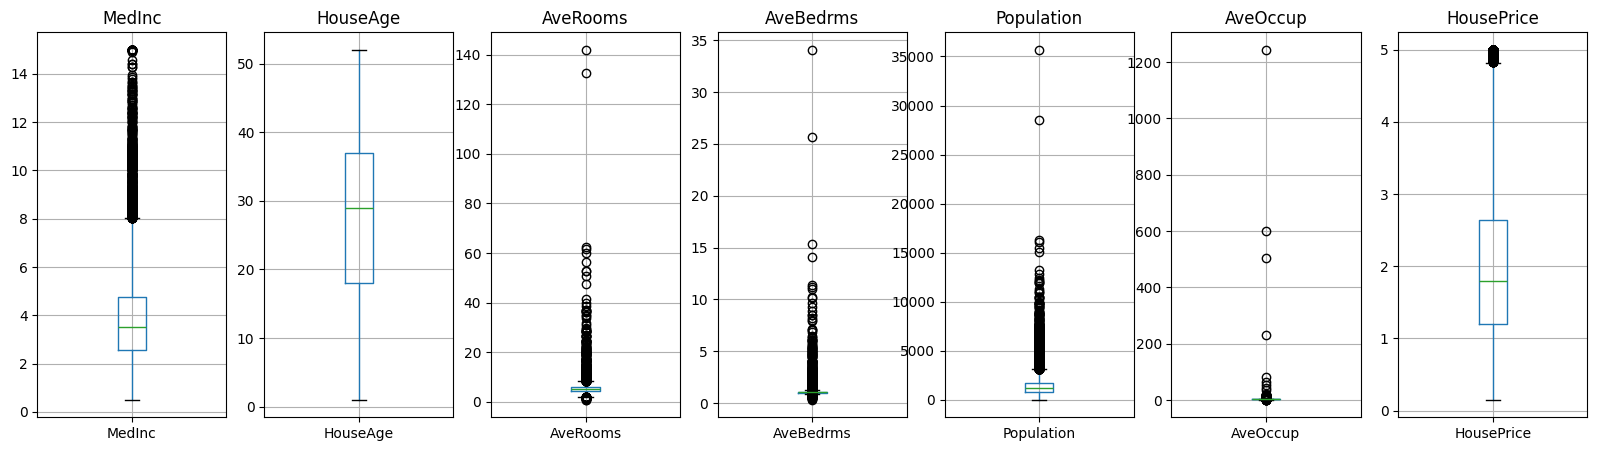

In [ ]:
def plot_boxplots(df):

  fig, axes =plt.subplots(1, len(df.columns), figsize=(20,5))

  for i, column_name in enumerate(df.columns):
    df.boxplot(column=column_name, ax=axes[i])
    axes[i].set_title(column_name)
  plt.show()

plot_boxplots(housing_df)

In [ ]:
def remove_outliers(df):
  df_no_outliers = df.copy()

  for column_name in df.columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers[column_name] = df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

  return df_no_outliers

housing_df_new = remove_outliers(housing_df)

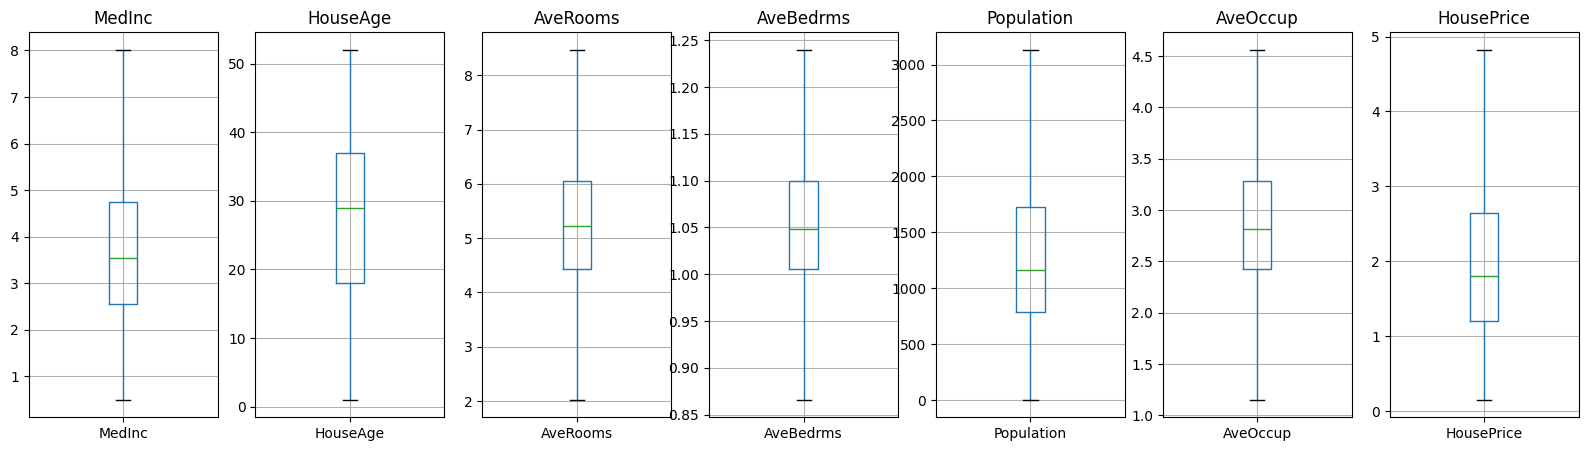

In [ ]:
plot_boxplots(housing_df_new)

In [ ]:
cols_to_convert =['MedInc', 'HouseAge', 'AveRooms',  'Population', 'AveOccup']
housing_df_new[cols_to_convert] = housing_df_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')

housing_df_new['HousePrice'] = pd.to_numeric(housing_df_new['HousePrice'], errors='coerce')

X = sm.add_constant(housing_df_new.drop('HousePrice', axis=1))
y = housing_df_new['HousePrice']

model = sm.OLS(y, X).fit()

Model Coefficients: 
 const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


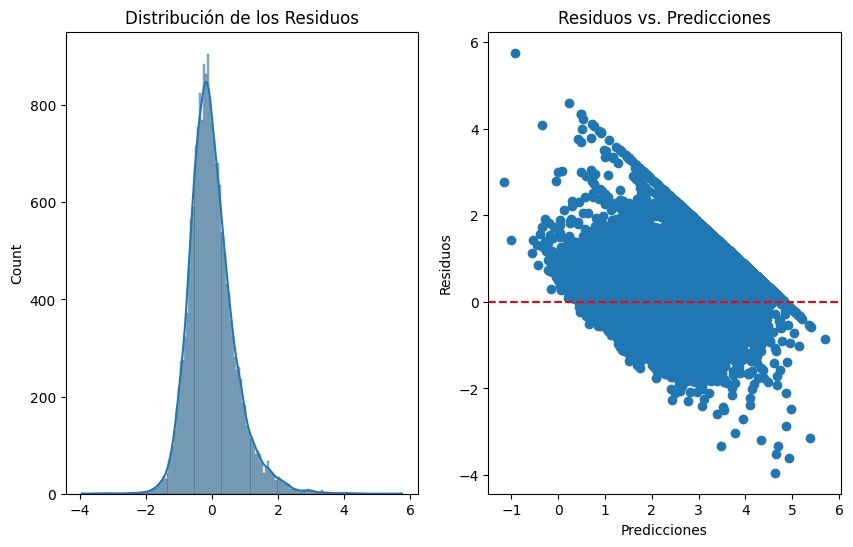

In [ ]:
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title('Distribución de los Residuos')

plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Predicciones')

print('Model Coefficients: \n', model.params)

In [ ]:
predictions = model.predict(X)

print('MSE:', mean_squared_error(y, predictions))
print('R2:', r2_score(y, predictions))

MSE: 0.49001892235770017
R2: 0.617696810976802


Después de aplicar la función para gestionar los outliers en nuestro dataset:

- **Error Cuadrático Medio (MSE)** pasó de **0.613** a **0.490**  
  - Esto indica que **los errores de predicción se redujeron**, es decir, el modelo ahora predice más cerca de los valores reales.  

- **R²** pasó de **0.540** a **0.618**  
  - Esto significa que **el modelo ahora explica mejor la variabilidad de los precios de las casas**.  



### REGRESION POLINOMICA

Es una forma de regresion lineal.

La relacion entre la variable independiente y la variable dependiente es modelada como un polinomio de n grados.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(	)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [ ]:
X = dataset.iloc[:,1:2].values  # todas las filas, y la columna 1 . devuelve un df 2D
Y = dataset.iloc[:,2].values    # todas las filas y la columna 2. devuelve una serie

#### MODELO LINEAL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

In [ ]:
def viz_linear():
  plt.scatter(X, Y, color='red')
  plt.plot(X, lin_reg.predict(X), color='blue')
  plt.title('Truth or Bluff (Linear Regression)')
  plt.xlabel('Position Level')
  plt.ylabel('Salary')
  plt.show()

  return


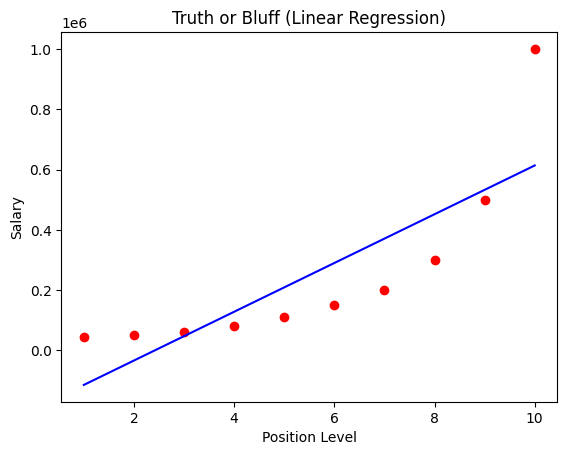

In [ ]:
viz_linear()

Podemos observar que la recta no se aajusta a la tendencia d elos puntos

#### MODELO POLINÓMICO

Con `PolynomialFeatures(degree=n)` transformamos la variable independiente `X` en un conjunto de nuevas variables que incluyen potencias de `X` hasta el grado `n`.
- Ejemplo: si `X = [[1], [2], [3]]` y usamos `degree=4`, la transformación será:

  `[[1, 1, 1^2, 1^3, 1^4],`

  `[1, 2, 2^2, 2^3, 2^4],`

  `[1, 3, 3^2, 3^3, 3^4]]`







In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Creamos un objeto PolynomialFeatures que genera nuevas columnas
poly_reg = PolynomialFeatures(degree=4)

# 2. Transformamos la variable original X en una nueva matriz con todas esas potencias.
X_poly = poly_reg.fit_transform(X)

# 3. Creamos un modelo de regresión lineal.
#    Ojo: es lineal en los parámetros (coeficientes), pero como las variables son X, X^2, X^3, X^4, el resultado es un modelo polinómico.
pol_reg_2 = LinearRegression()

# 4. Entrenamos (ajustamos) el modelo con los datos polinómicos transformados.
#    Es decir, encuentra los mejores coeficientes para cada término del polinomio.
pol_reg_2.fit(X_poly, Y)


LinearRegression()

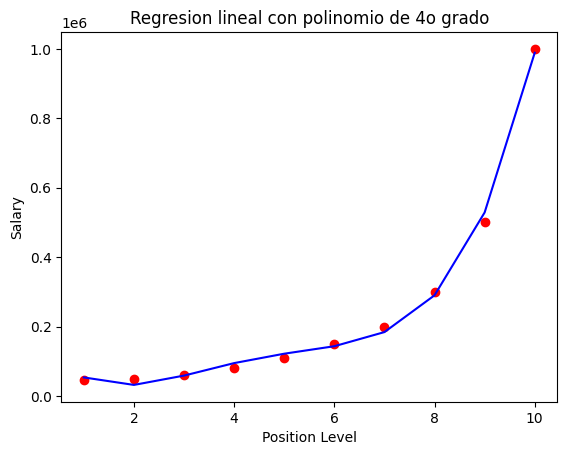

In [ ]:
def viz_polymonial():
  plt.scatter(X, Y, color='red')
  plt.plot(X, pol_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
  plt.title('Regresion lineal con polinomio de 4o grado')
  plt.xlabel('Position Level')
  plt.ylabel('Salary')
  plt.show()

  return

viz_polymonial()


In [ ]:
pred_lin = lin_reg.predict([[5.5],[6],[6.5]])
pred_lin

array([249500.        , 289939.39393939, 330378.78787879])

In [ ]:
pred_poly = pol_reg_2.predict(poly_reg.fit_transform([[5.5], [6],[6.5]]))
pred_poly

array([132148.43750002, 143275.05827509, 158862.45265155])

### RIDGE REGRESSION

- Se utiliza principalmente cuando existe **multicolinealidad** entre las variables independientes.  
- Su objetivo es **reducir la complejidad del modelo** penalizando los coeficientes, acercándolos a cero sin eliminarlos completamente.  
- Permite **minimizar la varianza del modelo** sin aumentar significativamente el sesgo, mejorando la generalización.  
- La técnica incorpora una **función de pérdida basada en la Suma de Residuos al Cuadrado (RSS)**, a la que se añade un término de penalización proporcional a la magnitud de los coeficientes.

#### Fórmula de Ridge Regression

    J (β) = ∑ ᵢ ⁿ  ( yᵢ - ̂y ᵢ )^2 +  λ  ∑ ⱼ ᴾ  (βⱼ)^2

- `yᵢ` → valor real de la variable dependiente.  
- ` ̂y ᵢ`→ valor predicho por el modelo.  
- `βⱼ` → coeficientes de la regresión.  
- `λ` → parámetro de regularización que controla la penalización.


**Interpretación de λ:**

- Si `λ = 0` → no hay penalización, equivalente a una regresión lineal estándar.  
- Si `λ  → ∞  ` → los coeficientes  `βⱼ` tienden a 0, simplificando el modelo y reduciendo la varianza.

**El intercepto (`intercept_`)**

- `intercept_` representa **el valor predicho cuando todas las variables independientes son 0**.  

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Ridge_moel = Ridge(alpha=1.0).fit(X_train, y_train)

Ridge_moel.intercept_

np.float64(3.8938654804528916)

In [ ]:
y_pred = Ridge_moel.predict(X_test)
print(f' El RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')  #RMSE (cuanto se desvia del valor real)
print(f' El r2 score: {r2_score(y_test,y_pred)}')


 El RMSE: 0.6268563375138515
 El r2 score: 0.39870643507758563


In [ ]:
coef1 = pd.Series(Ridge_moel.coef_, index=X_train.columns).sort_values()
coef1


,0
chlorides,-1.226774
volatile acidity,-1.021529
pH,-0.376223
citric acid,-0.164270
density,-0.011153
total sulfur dioxide,-0.003561
residual sugar,0.000624
free sulfur dioxide,0.005686
fixed acidity,0.019614
alcohol,0.297591


#### **GridSearch para encontrar hiperparámetros más rápido**

- **Qué es:** GridSearchCV es una herramienta de scikit-learn que permite **buscar automáticamente los mejores hiperparámetros** de un modelo.  
- **Cómo funciona:**  
  1. Definimos un **modelo base** (por ejemplo, Ridge Regression).  
  2. Creamos una **grid** con los valores de los hiperparámetros que queremos probar (por ejemplo, distintos valores de `alpha`).  
  3. GridSearchCV prueba **todas las combinaciones posibles** usando **validación cruzada**, evaluando cada configuración según una métrica (por ejemplo, MAE o RMSE).  
  4. Devuelve la **mejor configuración de hiperparámetros** y el desempeño correspondiente.  


In [ ]:
from sklearn.model_selection import GridSearchCV  #GridSearchCV, que sirve para buscar automáticamente los mejores hiperparámetros de un modelo

# Definimos la validación cruzada repetida
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Definimos la grid
grid = dict()  #Creamos un diccionario que indica qué valores probar para cada hiperparámetro
grid['alpha'] = np.arange(0, 1, 0.01)
model =Ridge()

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X, y)

print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best MAE: -0.505
Best Config: {'alpha': np.float64(0.13)}


In [ ]:
Ridge_moel = Ridge(alpha=0.13).fit(X_train, y_train)
y_pred = Ridge_moel.predict(X_test)

print(f' El RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')  #RMSE (cuanto se desvia del valor real)
print(f' El r2 score: {r2_score(y_test,y_pred)}')

 El RMSE: 0.6251949007102885
 El r2 score: 0.4018895802281459


Podemos observar que, tras ajustar el hiperparámetro `alpha` usando GridSearchCV, tanto el RMSE como el R² del modelo mejoraron ligeramente:

- Antes: RMSE = 0.6269, R² = 0.3987  
- Ahora:  RMSE = 0.6252, R² = 0.4019  

**Interpretación:**  
- La disminución del RMSE indica que las predicciones del modelo son **un poco más precisas**, es decir, se desvían menos de los valores reales de calidad del vino.  
- El aumento del R² indica que el modelo con alpha optimizado **explica ligeramente más la variabilidad** de la calidad del vino.  

En conjunto, esto demuestra que GridSearchCV permitió **mejorar ligeramente el ajuste del modelo** al encontrar el alpha más adecuado, aunque la mejora es pequeña porque el modelo inicial ya estaba razonablemente bien ajustado.


In [ ]:
coef2 = pd.Series(Ridge_moel.coef_, index=X_train.columns).sort_values()
print(f'Coeficientes ahora: \n {coef2}')
print(f'Coeficientes antes: \n {coef1}')

Coeficientes ahora: 
 chlorides              -1.711784
volatile acidity       -1.013311
pH                     -0.433504
citric acid            -0.148215
density                -0.062352
total sulfur dioxide   -0.003652
residual sugar          0.001963
free sulfur dioxide     0.005717
fixed acidity           0.014757
alcohol                 0.292432
sulphates               0.813658
dtype: float64
Coeficientes antes: 
 chlorides              -1.226774
volatile acidity       -1.021529
pH                     -0.376223
citric acid            -0.164270
density                -0.011153
total sulfur dioxide   -0.003561
residual sugar          0.000624
free sulfur dioxide     0.005686
fixed acidity           0.019614
alcohol                 0.297591
sulphates               0.746956
dtype: float64


### LASSO REGRESSION

- Es una variante de la regresión lineal que incorpora un término de **regularización L1**.  
- Su principal característica es que puede llevar **algunos coeficientes exactamente a 0**, eliminando así variables irrelevantes y reduciendo la complejidad del modelo.  
- Esto ayuda a combatir el **overfitting** y, al mismo tiempo, realiza una especie de **selección automática de variables**.  
- A diferencia de **Ridge Regression** (que reduce los coeficientes pero no los elimina), Lasso **penaliza de manera más fuerte los coeficientes grandes**, favoreciendo modelos más simples y fáciles de interpretar.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [ ]:
df['Salary'].fillna(df['Salary'].mean(skipna=True), inplace=True)
df.isna().sum()

,0
Unnamed: 0,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0


Podemos ver que hay objetos asi que los transfomaos a dummie variable con One-Hot-Encoding

In [ ]:
dum = pd.get_dummies(df[['League', 'Division', 'NewLeague']],drop_first=True)
dum.head()

,League_N,Division_W,NewLeague_N
0,False,False,False
1,True,True,True
2,False,True,False
3,True,False,True
4,True,False,True


In [ ]:
y= df['Salary']
X_num = df.drop(['Unnamed: 0','Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_num, dum], axis=1)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,False,False,False
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,True,False,True
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,False,False,False
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,False,True,False
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lasso_model = Lasso().fit(X_train, y_train)
lasso_model.intercept_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+07, tolerance: 3.821e+03
  model = cd_fast.enet_coordinate_descent(


np.float64(388.2940999384254)

In [ ]:
lasso_model.coef_

array([-1.97157613e+00,  5.41660370e+00,  4.29064176e+00, -2.14626422e-02,
       -9.59222357e-01,  4.67234905e+00, -8.82659132e+00, -2.05009633e-01,
        5.49409887e-01,  4.25615837e-02,  9.21435363e-01,  7.71155510e-01,
       -8.37563106e-01,  2.10122265e-01,  3.82232820e-01, -4.21746856e+00,
        1.07204003e+01, -1.11692855e+02, -0.00000000e+00])

In [ ]:
y_pred1 = lasso_model.predict(X_test)
print(f' El RMSE inicial: {np.sqrt(mean_squared_error(y_test, y_pred1))}')
print(f' El r2 score inicial: {r2_score(y_test,y_pred1)}')

 El RMSE inicial: 342.4173430838717
 El r2 score inicial: 0.36560323436994724


In [ ]:
alphas = np.logspace(-3, 2, 100)  # de 0.001 a 100
lasso_cv_model = LassoCV(alphas=alphas, cv=20, random_state=0, max_iter=10000).fit(X_train, y_train)
pd.Series(lasso_cv_model.coef_, index=X_train.columns).sort_values()

,0
Division_W,-89.667242
Years,-6.649214
Errors,-3.629805
AtBat,-1.958545
CWalks,-0.832624
RBI,-0.568042
CAtBat,-0.216709
Runs,0.000000
League_N,0.000000
NewLeague_N,0.000000


In [ ]:
lasso_cv_model.alpha_

np.float64(6.13590727341317)

In [ ]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)
y_pred2 = lasso_tuned.predict(X_test)

print(f' El RMSE tuned: {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f' El r2 score tuned: {r2_score(y_test,y_pred2)}')

 El RMSE tuned: 342.8016511052249
 El r2 score tuned: 0.3641784199684357


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.066e+06, tolerance: 3.821e+03
  model = cd_fast.enet_coordinate_descent(
